# Kapitza pendulum

*Kapitza pendulum* (also spelled *Kapitsa pendulum*) is a rigid pendulum in which the pivot point vibrates in a vertical direction. It is named after Pyotr Kapitsa (1978 Nobel Prize for discoveries in low-temperature physics), who in 1951 developed a theory which successfully explained its unusual properties. The contrintuitive  feature of the Kapitsa pendulum is that the vibrating suspension can cause it to balance stably in an inverted position, with the bob above the suspension point. 


[Demo of the Kapitza pendulum](https://youtu.be/5oGYCxkgnHQ)

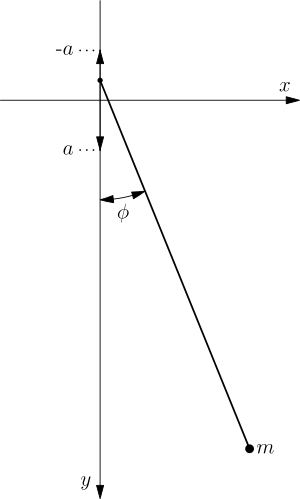

The parameters of the pendulum are its mass $m$ and length $l$, acceleration of gravity $g$, and the amplitude and the frequency of the pivot's oscillations $a$ and $\Omega$. The position of the pivot at time $t$ is  $a \sin(\Omega t)$.

The frequency of the pendulum's small oscillations with the pivot at rest is
$$
\omega = \sqrt{\frac{g}{l}} .
$$

The equation of motion of ot the pendulum is as follows:
$$
\frac{\mathrm{d}^2 \phi}{\mathrm{d}t^2} + \left(\omega^2 + (a/l) \; \Omega^2 \sin(\Omega t)\right) \sin(\phi) = 0.
$$

If we introduce the dimensionless time-like variable
$$\tau = \omega t,$$
the equation of motion ogf the Kapitza pendulim can be written in the following form
$$
\frac{\mathrm{d}^2 \phi}{\mathrm{d}\tau^2} + \left(1 + \epsilon \; \lambda^2 \sin(\lambda \tau)\right) \sin(\phi) = 0
$$
that contains only two dimensionless parameters:
$$
\epsilon \equiv \frac{a}{l},
$$
$$
\lambda = \frac{\Omega}{\omega} .
$$

Finally, to make observations of stable directions of oscillation easier, we introduce weak friction $\sim \frac{\mathrm{d} \phi}{\mathrm{d}\tau}$ with a friction coefficient $\gamma$:
$$
\frac{\mathrm{d}^2 \phi}{\mathrm{d}\tau^2} 
+ \gamma \frac{\mathrm{d} \phi}{\mathrm{d}\tau}
+ \left(1 + \epsilon \; \lambda^2 \sin(\lambda \tau)\right) \sin(\phi)  
= 0 .
$$

The goal of the assignment is to investigate numerically the solutions of the above equation. We are interested in the case whem $\epsilon \ll 1$, $\gamma \ll 1$, $\lambda \gg 1$. 

To be specific, we set $\epsilon = 0.01$ and $\gamma = 0.04$.

Load the required julia packages

In [ ]:

using OrdinaryDiffEqTsit5
using PyPlot

Right hand side of the ODE system of equations for Kapitza pendulum:

In [ ]:

"""
    kapitza_pendulum!(dydt, y, p, tau)

Right hand side of the ODE system of equations for Kapitsa pendulum.
y = [phi, dphi/dtau], p = (epsilon, lambda, gamma) where epsilon = a/l, lambda = Omega/omega, 
gamma is a (small) friction coefficient.
"""
function kapitza_pendulum!(dydt, y, p, tau)
    epsilon, lambda, gamma = p # unpack parameters
    # Your code here
    return nothing
end

Initial conditions and parameters:

In [ ]:
tspan = (0.0, 100.0)
u0 = [pi - pi/24, 0.0]  # initial position is close to the 'up' direction, the pendulum is initially at rest
epsilon = 0.01
gamma = 0.04;

Equidistant time grid for plotting: 

In [ ]:

np = 1000
tau = range(tspan[1], tspan[2], length=np)

Plot the solutions for oscillations about up and down directions:

In [ ]:

lambdamin = 100.0
lambdamax = 200.0
for lambda = [lambdamin, lambdamax]
    # Pack the parameters
    p = (epsilon, lambda, gamma)

    # Solve the ODE
    prob = ODEProblem(# your code here) 
    sol = solve(prob, Tsit5(), reltol=1e-10, abstol=1e-10);

    # Calculate the solution in equidistant points
    sl = sol(tau);

    # Extract the angle of deflection and plot it vs 'time'
    phi = sl[1, :];
    plot(tau, phi, label=L"\lambda = %$lambda")
end

grid(true)
xlabel(L"\tau")
ylabel(L"$\phi(\tau)$")
legend()
title("Kapitza pendulum: a/l = $epsilon, λ = Ω/ω");

Adjusting $\lambda_{min}$ and $\lambda_{max}$ try to bracket (with the relative error of better than 5%) the critical value of $\lambda$ when the 'up' direction of oscillations becomes stable.

Show your code below and clearly present your results and reasoning. 